In [2]:
import tensorflow as tf;
import pandas as pd;
import matplotlib.pyplot as plt

#Read insurance data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

2023-12-17 19:39:55.428585: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create colum transform
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create X and Y values
X= insurance.drop("charges", axis=1)
y=insurance["charges"]

#Build our train and test sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transforer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler and OneHotEncoder)
X_train_normal=ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [9]:
# Actual data looks like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [10]:
#Transform data looks like
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [11]:
#check the shap of data
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [4]:
#Build neural network and fid data

#Create Random seed
tf.random.set_seed(42)

#Create model 
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=['mae']
)

#Fit the model
history=insurance_model.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13315.7070 - mae: 13315.7070
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12808.3359 - mae: 12808.3359
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 10759.3232 - mae: 10759.3232
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 8738.0059 - mae: 8738.0059
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 8516.3154 - mae: 8516.3154
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 8435.3467 - mae: 8435.3467
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8371.2900 - mae: 8371.2900
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 8332.7715 - mae: 8332.7715
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 8312.5137 - mae: 8312.5137
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 8298.6777 - mae: 829

In [15]:
#Evaluate insurance model trained on normalized data
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8639.5117 - mae: 8639.5117


[8639.51171875, 8639.51171875]

Text(0.5, 0, 'epochs')

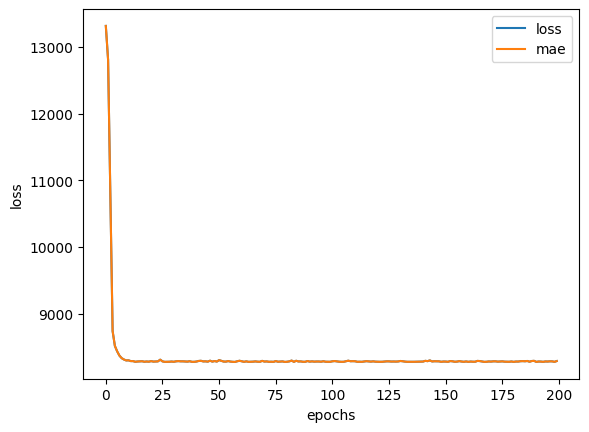

In [5]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")